In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
# import data
df = pd.read_csv('data/processed.cleveland.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns=['age',
'sex',
'cp',
'trestbps',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'hd']

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [9]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
### removing the missing data

In [12]:
data_with_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [13]:
X = data_with_no_missing.drop('hd', axis=1).copy()

In [14]:
y = data_with_no_missing['hd'].copy()

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
### columns with categorical values
### 'cp', 'restecg', 'slope', 'thal'

In [18]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [19]:
y.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [20]:
### for now considering only two classes, but y has multiple classes

In [26]:
y_with_1_class_index = (y > 0) # all other classes as 1
y[y_with_1_class_index] = 1

In [27]:
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [56]:
rcf = RandomForestClassifier() # default decision trees 100
rcf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70)

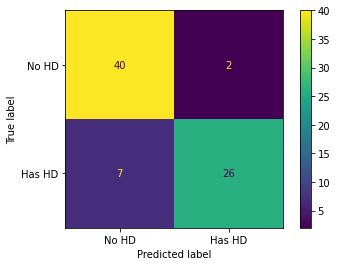

In [57]:
plot_confusion_matrix(rcf, X_test, y_test, display_labels=['No HD', 'Has HD'])

In [58]:
rcf.score(X_test, y_test) * 100

88.0

In [59]:
rcf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
### Evaluating score based on estimators

In [53]:
estimators = range(10, 200, 10)

scores = []

for estimator in estimators:
    rcf = RandomForestClassifier(n_estimators=estimator)
    rcf.fit(X_train, y_train)
    scores.append(rcf.score(X_test, y_test) * 100)

In [54]:
len(scores)

19

<AxesSubplot:xlabel='trees'>

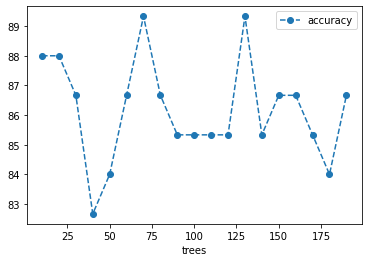

In [55]:
df = pd.DataFrame(data={'trees': estimators, 'accuracy': scores})
df.plot(x='trees', y='accuracy', marker='o', linestyle='--')

In [60]:
### from above looks like using 70 tress has also better accuracy

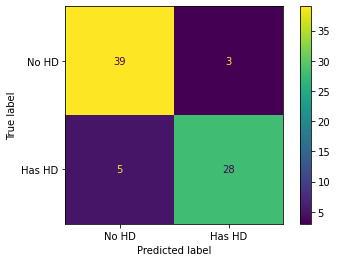

In [63]:
rcf = RandomForestClassifier(n_estimators=70) # default decision trees 100
rcf.fit(X_train, y_train)
plot_confusion_matrix(rcf, X_test, y_test, display_labels=['No HD', 'Has HD'])

In [64]:
rcf.score(X_test, y_test) * 100

89.33333333333333